# Lecture 5.2 Data I/O: xarray and Pandas

Sep 26, 2019

## 1. Announcements

### Homework Assignment for Week 5: 
Import your data into python using pandas, xarray, or some other method, do some analysis, make some plots and explain your methods and results. You will present this to the class next Tuesday in a powerpoint presentation (or similar), along with an introduction to your dataset. There should be about 5 slides, no more than 10, and your talk should last about 5 min, 8 min max including questions. Load this presentation before class into github and call it HW_5_yourname.

See grading rubric on github

## 2. Warm-up:

Code a function that calculates the volume of a cube, given the length of a side. Use this to plot how volume scales with length of a side. Label your plot.

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [58]:
def cube(x):
    vol = x ** 3 
    print('Volume of cube:', vol)
  

In [59]:
cube(7)

Volume of cube: 343


In [60]:
x = np.arange(1,25,1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [61]:
def cube_plot(x):
    vol = x ** 3 
    plt.plot(x,vol)
    plt.title('Length vs. Volume of Cube')
    plt.xlabel('Length of Side')
    plt.ylabel('Volume of Cube')

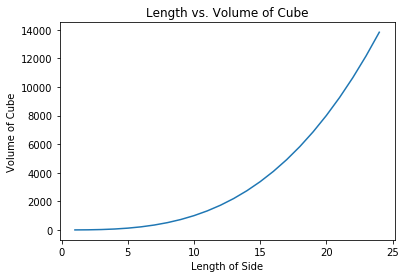

In [62]:
cube_plot(x)


## 3. Lecture Examples:

* Importing text files (we have done this)
* File I/O and pandas intro (I/O means input and output)
* Introduction to xarray and plotting netcdf files 

### Text files

In [63]:
data = np.loadtxt('populations.txt')

### Spreadsheets

Many of your data sets will be in excel files. We use xarray for netcdf files, and you have just seen that this gave you consise and useful information about the content of the netcdf file. Xarray is built on pandas, which works similarly for spreadsheets.

Download this data file:

https://www.dataquest.io/blog/large_files/movies.xls


#### Load the file

In [64]:
import pandas as pd

In [65]:
ted = pd.read_csv('ted.txt')

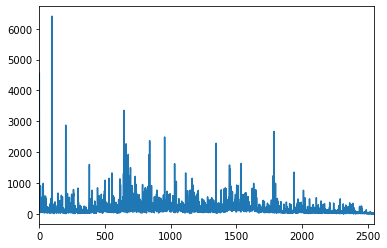

In [66]:
ted.comments.plot()

In [67]:
ted.head() #prints just the first few lines, similar to head() in R

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [68]:
#ted?  #can read all sorts of stuff about the df

#### Transfer the file to a numpy array

In [69]:
ted_numpy = ted.values #transfers the data frame to an arrary 

In [70]:
ted_numpy.shape #how big is the array 

(2550, 17)

### Netcdf files

Goto https://www.hycom.org/

In [71]:
import xarray as xr

In [72]:
bathy = xr.open_dataset('depth_GOMu0.04_03i.nc', decode_times=False)

Note you can also modify a pandas data frame into an xarray dataset

In [73]:
bathy

<xarray.Dataset>
Dimensions:    (Latitude: 346, Longitude: 541, MT: 1)
Coordinates:
  * MT         (MT) float64 0.0
    Date       (MT) float64 ...
  * Latitude   (Latitude) float32 18.12 18.16 18.2 18.24 ... 31.84 31.88 31.92
  * Longitude  (Longitude) float32 -98.0 -97.96002 ... -76.44 -76.400024
Data variables:
    depth      (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    title:        HYCOM
    source:       HYCOM archive file
    experiment:   00.0
    history:      archv2ncdf2d

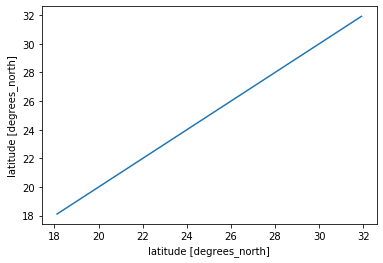

In [74]:
bathy.Latitude.plot() ##this is awesome, allyou need is .polt and it will plotyour variable and label it 

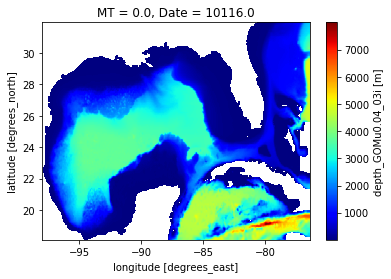

In [75]:
bathy.depth.plot(cmap = 'jet') #remember cmap is color map

In [76]:
myfile = 'hycom_gomu_501_2000010100_t012.nc'

In [77]:
mydata = xr.open_dataset(myfile)

In [78]:
mydata

<xarray.Dataset>
Dimensions:     (depth: 40, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2000-01-01T12:00:00
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * depth       (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
Data variables:
    surf_el     (time, lat, lon) float32 ...
    salinity    (time, depth, lat, lon) float32 ...
    water_temp  (time, depth, lat, lon) float32 ...
    water_u     (time, depth, lat, lon) float32 ...
    water_v     (time, depth, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    histor

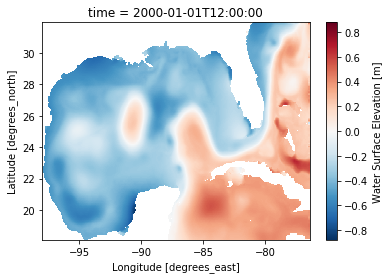

In [79]:
mydata.surf_el.plot()

## Exercise: plot water temp at the surface and at depths:
* 200
* 1000
* 2000 

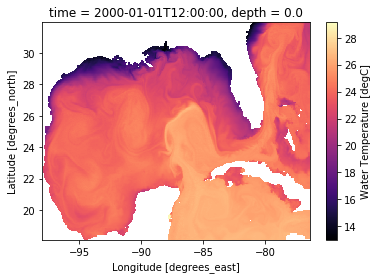

In [80]:
mydata.water_temp[0,0,:,:].plot(cmap = 'magma')

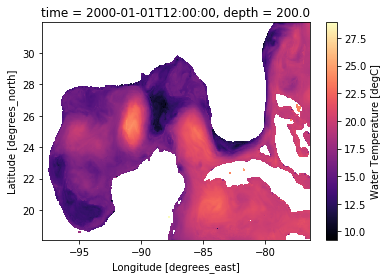

In [81]:
# Water temperature at 100 meter depth 
# 22 is the index value for depth of 100 m
mydata.water_temp[0,22,:,:].plot(cmap = 'magma')

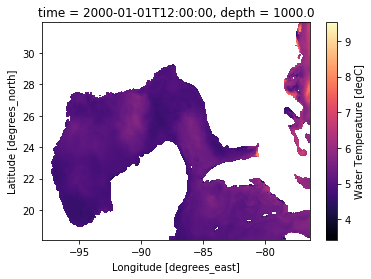

In [82]:
# Water temp at depth of 1000 meters
# 32 is index for 1000 depth 
mydata.water_temp[0,32,:,:].plot(cmap = 'magma')

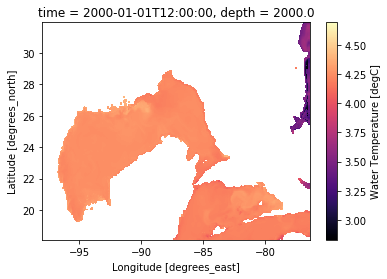

In [83]:
# Water temp at 2000 meters
mydata.water_temp[0,35,:,:].plot(cmap = 'magma')

In [84]:
mydata.depth

<xarray.DataArray 'depth' (depth: 40)>
array([0.00e+00, 2.00e+00, 4.00e+00, 6.00e+00, 8.00e+00, 1.00e+01, 1.20e+01,
       1.50e+01, 2.00e+01, 2.50e+01, 3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01,
       5.00e+01, 6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01, 1.00e+02, 1.25e+02,
       1.50e+02, 2.00e+02, 2.50e+02, 3.00e+02, 3.50e+02, 4.00e+02, 5.00e+02,
       6.00e+02, 7.00e+02, 8.00e+02, 9.00e+02, 1.00e+03, 1.25e+03, 1.50e+03,
       2.00e+03, 2.50e+03, 3.00e+03, 4.00e+03, 5.00e+03])
Coordinates:
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
Attributes:
    long_name:               Depth
    standard_name:           depth
    units:                   m
    positive:                down
    axis:                    Z
    NAVO_code:               5
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

In [85]:
mydata.depth[32]

<xarray.DataArray 'depth' ()>
array(1000.)
Coordinates:
    depth    float64 1e+03
Attributes:
    long_name:               Depth
    standard_name:           depth
    units:                   m
    positive:                down
    axis:                    Z
    NAVO_code:               5
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

## 4. Lab:
    
We are doing a pandas tutorial: 

https://github.com/justmarkham/pycon-2019-tutorial
    
Use your headphones, go at your own pace. Remember to write text and comments as you go along. Finish this as homework if you don't complete in class. Note this requires you have a python environment on a non-lab computer, see me if assistance is needed on this.

In [86]:
import pandas as pd

In [87]:
ted = pd.read_csv('ted.txt')

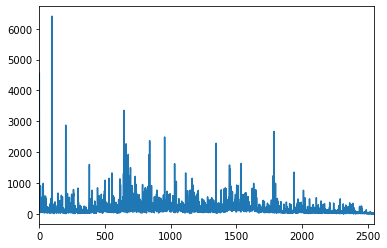

In [88]:
ted.comments.plot()

  # 1. Introduction to the datset

In [89]:
import pandas as pd

In [90]:
import matplotlib.pyplot as plt

In [91]:
ted = pd.read_csv('ted.txt')

In [92]:
ted.shape

(2550, 17)

In [93]:
ted.dtypes #type of data in the variables

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [94]:
ted.isna().sum() # this checks for missing values
#thing to note with this data set is that speaker occupation has 6 missing values

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# 2. Which talks provoke the most online discussion?

In [95]:
ted.sort_values('comments').tail()
#this method ignores nested comments and misses a lot of comments
#also ignores how long the talk has been online
# to correct for this normalize the data by views


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [96]:
ted['comments_per_view'] =ted.comments / ted.views 

In [97]:
ted.sort_values('comments_per_view').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
2534,2,What the astronauts felt when they saw Earth f...,725,TEDxSkoll,1491523200,1,Benjamin Grant,Benjamin Grant: What it feels like to see Eart...,1,1504814438,"[{'id': 10, 'name': 'Inspiring', 'count': 46},...","[{'id': 2511, 'hero': 'https://pe.tedcdn.com/i...",Author,"['TEDx', 'art', 'climate change', 'environment...",What it feels like to see Earth from space,https://www.ted.com/talks/benjamin_grant_what_...,646174,0.000003
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.com/talks/francoise_mouly_the_...,839040,0.000004
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007


In [98]:
#better way to look at this
ted['veiws_per_comment'] =ted.views / ted.comments

In [99]:
ted.sort_values('veiws_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,veiws_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


 # 3. Visualize the distribution of comments

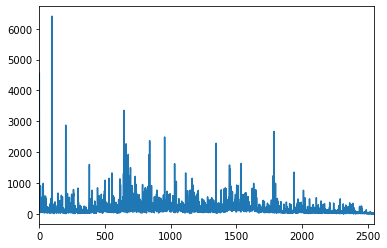

In [100]:
#make a quick plot
ted.comments.plot()
#line plot is not a good chice for this type of data

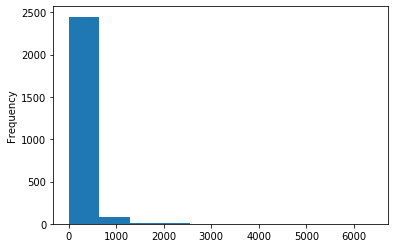

In [101]:
# make a frequency distribution
ted.comments.plot(kind = 'hist')
# need to modify the number of bins
#

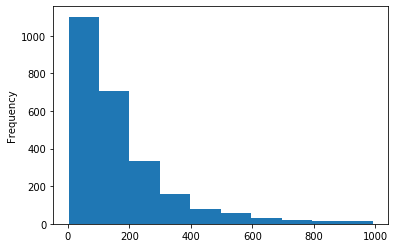

In [102]:
# to make this more informative filter the data frame
ted[ted.comments < 1000].comments.plot(kind= 'hist')
# this is more informative becasue it focuses on the majority of the data


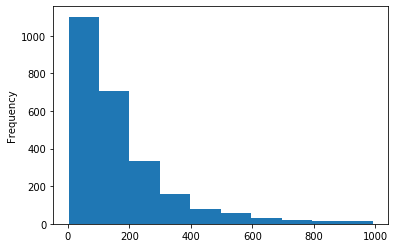

In [103]:
ted.query('comments < 1000').comments.plot(kind='hist')
#this is another way to do the same thing as above

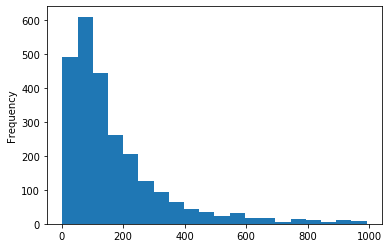

In [104]:
#another way to do this
ted.loc[ted.comments < 1000, 'comments'].plot(kind = 'hist', bins=20) # increas number of bins to see data at finer scale
# .loc has more functionality, you can also pass
# can select multiple colums, list of colums, a range of colums

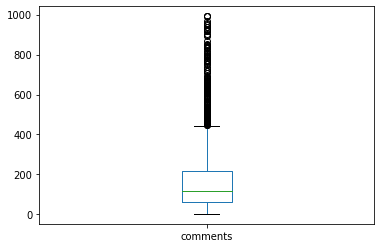

In [105]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind = 'box')

# 4. Plot the number of talks that took place each year

In [106]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit = 's')
# create a new column

In [107]:
#check to see if the data in the new column match data for date elsewhere in the df
# I am comparing a randome sample of time events and date_times
ted[['event', 'film_datetime']].sample(5)

#looks like it worked 

,event,film_datetime
2453,TED2017,2017-04-24
598,TEDMED 2009,2009-10-21
617,TEDMED 2009,2009-10-10
1900,TEDYouth 2014,2014-11-15
1551,TEDxCERN,2013-05-08


In [108]:
# had to stop video at 40 min 10 seconds 
# https://www.youtube.com/watch?v=dPwLlJkSHLo

In [109]:
ted.film_datetime.dt.year # can also use dt.dayofweek dt.dayofyear 

0       2006
1       2006
2       2006
3       2006
4       2006
5       2006
6       2006
7       2006
8       2006
9       2006
10      2006
11      2006
12      2006
13      2006
14      2006
15      2006
16      2004
17      2006
18      2005
19      2005
20      2006
21      2004
22      2006
23      2006
24      2004
25      2005
26      2005
27      2004
28      2004
29      2004
        ... 
2520    2017
2521    2016
2522    2017
2523    2016
2524    2017
2525    2016
2526    2017
2527    2017
2528    2016
2529    2015
2530    2017
2531    2016
2532    2017
2533    2017
2534    2017
2535    2017
2536    2017
2537    2017
2538    2016
2539    2017
2540    2017
2541    2017
2542    2017
2543    2017
2544    2017
2545    2017
2546    2017
2547    2017
2548    2017
2549    2017
Name: film_datetime, Length: 2550, dtype: int64

In [110]:
#use value counts to count number of talks per year 
ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

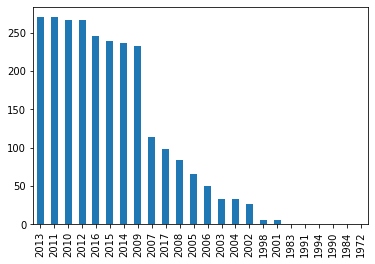

In [111]:
#barplot, not best type of plot to use because it excludes years with no data
ted.film_datetime.dt.year.value_counts().plot(kind='bar')

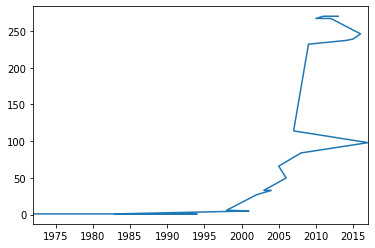

In [113]:
#line plot is better becasue this is data through time 
ted.film_datetime.dt.year.value_counts().plot()
#what went wrong here, why is it so weird!
# a sorting issue is the problem 

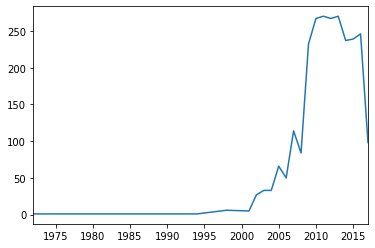

In [114]:
# pandas is plotting thing in the order that they appear 
#use sort index to solve this  porblem 
ted.film_datetime.dt.year.value_counts().sort_index().plot()

In [115]:
ted.film_datetime.max()
#data ends inthe middle of the year explaining sharp drop

Timestamp('2017-08-27 00:00:00')

# 5. What were the best events in ted history to attend

In [118]:
ted.event.value_counts().head ()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [128]:
ted.groupby('event').views.agg(['count','mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [129]:
ted.groupby('event').views.agg(['count','mean', 'sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


# 6. Unpack the ratings data

In [132]:
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [133]:
ted.ratings[0] 
#this is a stringified list of dictionaries

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [134]:
import ast 

In [135]:
ast.literal_eval('[1,2,3]')
# here I passed this a string that looks like a list 
# and it returns an actual list

[1, 2, 3]

In [137]:
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [138]:
#make a funtion that converts the string to a list
def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [139]:
str_to_list(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [141]:
#now do this to the entire ratings data
ted.ratings.apply(str_to_list).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [143]:
#another way to do this, a better way
ted.ratings.apply(ast.literal_eval).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [145]:
#store this as a new colums
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [146]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [147]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
veiws_per_comment            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

# 7. Count the total numbe of ratings received by each talk 

    new coulmn named 'num_ratings'

In [155]:
def get_num_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d['count']
    return num

In [156]:
get_num_ratings(ted.ratings_list[0])

93850

In [160]:
#store this data as num_ratings
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [161]:
#check to see if your resutls make sense
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

# 8. Which occupations deliver the funniest TED talks on average?

 Step 1: Count the number of funny ratings

In [164]:
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [168]:
ted.ratings.str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

In [169]:
#write function to get the number of funny ratings
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [171]:
# save the results to 'funny_ratings'
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)

In [172]:
#check your work
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

In [173]:
# now create a column the has the ratio of funny rating vs total ratings
ted['funny_rate'] = ted.funny_ratings / ted.num_ratings

In [174]:
#now look at the occupations of the speakers with 
#the highest funny ratings 
#use .tail(20) to get a bigger sample of the funniest speakers
ted.sort_values('funny_rate').speaker_occupation.tail(20)

1849                       Science humorist
337                                Comedian
124     Performance poet, multimedia artist
315                                  Expert
1168             Social energy entrepreneur
1468                          Ornithologist
595                  Comedian, voice artist
1534                         Cartoon editor
97                                 Satirist
2297                          Actor, writer
568                                Comedian
675                          Data scientist
21                     Humorist, web artist
194                                Jugglers
2273                    Comedian and writer
2114                    Comedian and writer
173                                Investor
747                                Comedian
1398                               Comedian
685             Actor, comedian, playwright
Name: speaker_occupation, dtype: object

In [175]:
#intuition would indicate that these people are actuallyfunny people


Step 3: Analyze the funny rate by occupation 
    

In [177]:
ted.groupby('speaker_occupation').funny_rate.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [178]:
ted.speaker_occupation.describe()
#many of the occupations have a small sample size

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

Step 4: Focus on occupations that are wee represented in the data

In [181]:
#this is a pandas data series
occupation_counts = ted.speaker_occupation.value_counts()

In [183]:
#you can filter series
# filter to include only occupations that occur at least 5 times
#make an index and save it
top_occupations = occupation_counts[occupation_counts >= 5].index

In [184]:
type(top_occupations)

pandas.core.indexes.base.Index

In [187]:
#filter the dataframe to only include talks with 
#speakers from the top occupations
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]

In [190]:
ted_top_occupations.shape

(786, 24)

In [191]:
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values()

speaker_occupation
Surgeon                                       0.002465
Physician                                     0.004515
Photojournalist                               0.004908
Investor and advocate for moral leadership    0.005198
Photographer                                  0.007152
Environmentalist, futurist                    0.007317
Violinist                                     0.009534
Singer-songwriter                             0.010597
Chemist                                       0.010970
Philanthropist                                0.012522
Activist                                      0.012539
Astrophysicist                                0.013147
Oceanographer                                 0.014596
Paleontologist                                0.015780
Social psychologist                           0.015887
Tech visionary                                0.016654
Sculptor                                      0.016960
Social Media Theorist                         